### Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 

In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\bhuli\anaconda3\lib\site-packages (1.5.3)



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
df = pd.read_csv('Unemployment in India.csv')
df.head(100)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
95,Haryana,30-06-2019,Monthly,23.08,4745178.0,45.23,Rural
96,Haryana,31-07-2019,Monthly,16.22,4826560.0,42.17,Rural
97,Haryana,31-08-2019,Monthly,30.94,4558306.0,48.23,Rural
98,Haryana,30-09-2019,Monthly,16.36,5127956.0,44.72,Rural


In [6]:
df=pd.read_csv("Unemployment in India.csv")

In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
#Check column list present in df
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
#check descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [11]:
#check the number of rows and columns present in df
print('rows---->',df.shape[0])
print('columns---->',df.shape[1])

rows----> 768
columns----> 7


In [12]:
#Lets see null value count in df
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
 df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [17]:
df.columns=['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)','Estimated Employed', 'Estimated Labour Participation Rate (%)','Area']
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [18]:
df.corr()

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_100768\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


In [19]:
#Find the missing values from each column
print(df.isnull().sum())

Region                                     28
 Date                                      28
 Frequency                                 28
 Estimated Unemployment Rate (%)           28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [20]:
#Find the total number of missing values from the entire dataset
df.isnull().sum().sum() 

196

In [21]:
#Deleting the entire row (listwise deletion)
df = df.dropna(axis=0)
df.isnull().sum()

Region                                     0
 Date                                      0
 Frequency                                 0
 Estimated Unemployment Rate (%)           0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [24]:
#Deleting the entire column
df = df.drop(['Area'],axis=1)
df.isnull().sum()

Region                                     0
 Date                                      0
 Frequency                                 0
 Estimated Unemployment Rate (%)           0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
dtype: int64

In [28]:
#Replacing with an arbitrary value
#Replace the missing value with '0' using 'fiilna' method
df['Estimated Employed'] = df['Estimated Employed'].fillna(0)
df['Estimated Employed'].isnull().sum()

0

In [33]:
# Providing the input and output data
# importing numpy library
import numpy as np

In [36]:
#the input data (x, regressor)
x = np.array(df["Estimated Employed"]).reshape(-1,1)

In [37]:
x.shape

(740, 1)

In [38]:
print(x)

[[11999139.]
 [11755881.]
 [12086707.]
 [12285693.]
 [12256762.]
 [12017412.]
 [11397681.]
 [12528395.]
 [12016676.]
 [11723617.]
 [11359660.]
 [ 8792827.]
 [ 9526902.]
 [15572975.]
 [11749334.]
 [ 8923222.]
 [ 9911534.]
 [ 9292039.]
 [11468349.]
 [ 8395906.]
 [ 9625362.]
 [11420996.]
 [ 8462814.]
 [ 9878742.]
 [ 9926176.]
 [ 7544937.]
 [24322330.]
 [24097712.]
 [23248875.]
 [22260203.]
 [23905700.]
 [24053140.]
 [22445989.]
 [22914530.]
 [23409006.]
 [23168192.]
 [22667882.]
 [14645275.]
 [14050319.]
 [20622566.]
 [ 6259019.]
 [ 6608626.]
 [ 6753622.]
 [ 6607694.]
 [ 6490776.]
 [ 7043840.]
 [ 6942931.]
 [ 6569385.]
 [ 6236201.]
 [ 6847173.]
 [ 6894808.]
 [ 6534321.]
 [ 5454091.]
 [ 5781095.]
 [  169487.]
 [  149076.]
 [  166605.]
 [  135407.]
 [  166056.]
 [  149511.]
 [  178768.]
 [  145671.]
 [  157791.]
 [  147500.]
 [  152413.]
 [  115487.]
 [  129610.]
 [  112108.]
 [  179340.]
 [  170471.]
 [  167437.]
 [  183603.]
 [  163215.]
 [  177440.]
 [  159489.]
 [  177155.]
 [  158936.]

In [39]:
print(type(x))

<class 'numpy.ndarray'>


In [42]:
#the input data (x, regressor)
y = np.array(df["Estimated Labour Participation Rate (%)"])

In [43]:
y.shape

(740,)

In [46]:
print(y)

[43.24 42.05 43.5  43.97 44.68 43.01 41.   45.14 43.46 42.83 40.66 36.03
 38.16 53.76 57.39 43.87 48.21 45.83 55.67 40.76 46.64 54.9  40.17 47.05
 50.   34.38 39.75 39.71 39.66 36.85 38.57 40.31 37.51 37.25 37.54 37.28
 38.88 38.63 38.5  37.4  42.89 43.71 43.53 42.55 43.38 46.28 43.56 42.59
 42.03 45.05 44.98 39.43 35.56 38.66 42.33 35.74 40.53 35.21 40.68 37.9
 42.71 37.08 38.36 35.84 37.45 30.21 34.65 29.22 39.16 38.19 39.81 39.61
 35.78 40.36 44.09 38.7  35.36 36.11 45.36 33.71 52.03 50.12 54.21 50.57
 51.01 52.27 54.55 51.51 54.07 53.48 52.06 34.77 46.31 47.72 45.12 45.23
 42.17 48.23 44.72 46.07 42.48 47.4  43.74 45.37 41.4  49.85 42.78 48.53
 44.23 41.18 44.91 44.91 45.02 42.81 48.5  44.05 45.11 42.45 40.17 18.43
 42.62 41.2  40.57 39.02 41.71 44.17 43.08 39.69 42.56 38.25 39.06 38.46
 34.94 39.04 41.12 39.66 40.83 41.24 42.33 40.26 41.09 42.43 44.05 37.96
 36.92 37.03 40.65 46.36 43.12 38.42 39.93 44.45 43.1  36.45 39.92 44.52
 41.33 40.85 43.25 43.09 53.37 38.07 42.19 34.96 39.

In [45]:
print(type(y))

<class 'numpy.ndarray'>


In [47]:
#splitting the dataset
#import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [48]:
#Eploring the train and testn datasets
x_train.shape

(518, 1)

In [49]:
x_test.shape

(222, 1)

In [50]:
y_train.shape

(518,)

In [51]:
y_test.shape

(222,)

In [54]:
# Data visualisation
#Estimated no. of employees in different states 
plt.title('Indian Unemployment')
sns.histplot(x=' Estimated Employed',hue='State',data=df)
plt.show()

NameError: name 'plt' is not defined

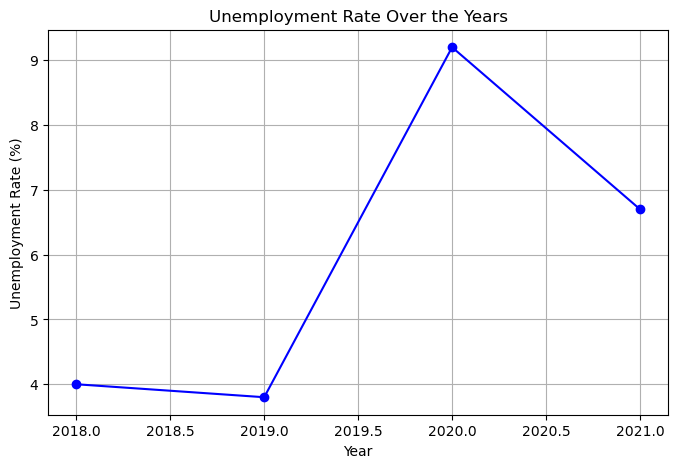

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for unemployment rate
years = [2018, 2019, 2020, 2021]
unemployment_rate = [4.0, 3.8, 9.2, 6.7]

# Create a DataFrame
df = pd.DataFrame({'Year': years, 'Unemployment Rate (%)': unemployment_rate})

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Unemployment Rate (%)'], marker='o', color='b', linestyle='-')
plt.title('Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import r2_score
score = r2_score(df["Estimated Employed"], df["Estimated Labour Participation Rate (%)"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -79.0%
